In [1]:
import os
import re
def DIR2lasti(DIR,pattern='seed(\d+)_size600'):
    dlst = os.listdir(DIR)
    dlst = ''.join(dlst)
    it = re.findall(pattern,dlst)
    lasti = max(map(int,it))
    return lasti
DIR = 'data_pdist/'
DIR2lasti(DIR)

import numpy as np
fs = os.listdir(DIR)
out = sum((np.load(os.path.join(DIR,f)).tolist()  for f in fs),[])


In [2]:
# %matplotlib notebook
from pymisca.util import *
from pymisca.vis_util import *
import IPython.display as ipd

import KBs
import random
import workers

DIR = 'data_pdist'
tst_dct = [{'family':'2dntca','rulestr':x[1]} for x in KBs.tst_data]
tst_out = mp_map(workers.worker0323,tst_dct,n_cpu=12)
print 'finished'

is in ipython: 1
[WARN] pymisca.vis_util cannot find network
finished


KBs.py:375: RuntimeWarning: invalid value encountered in divide
  COR = COV /  np.sqrt(D[:,None]*D[None,:])


finished


<IPython.core.display.Javascript object>


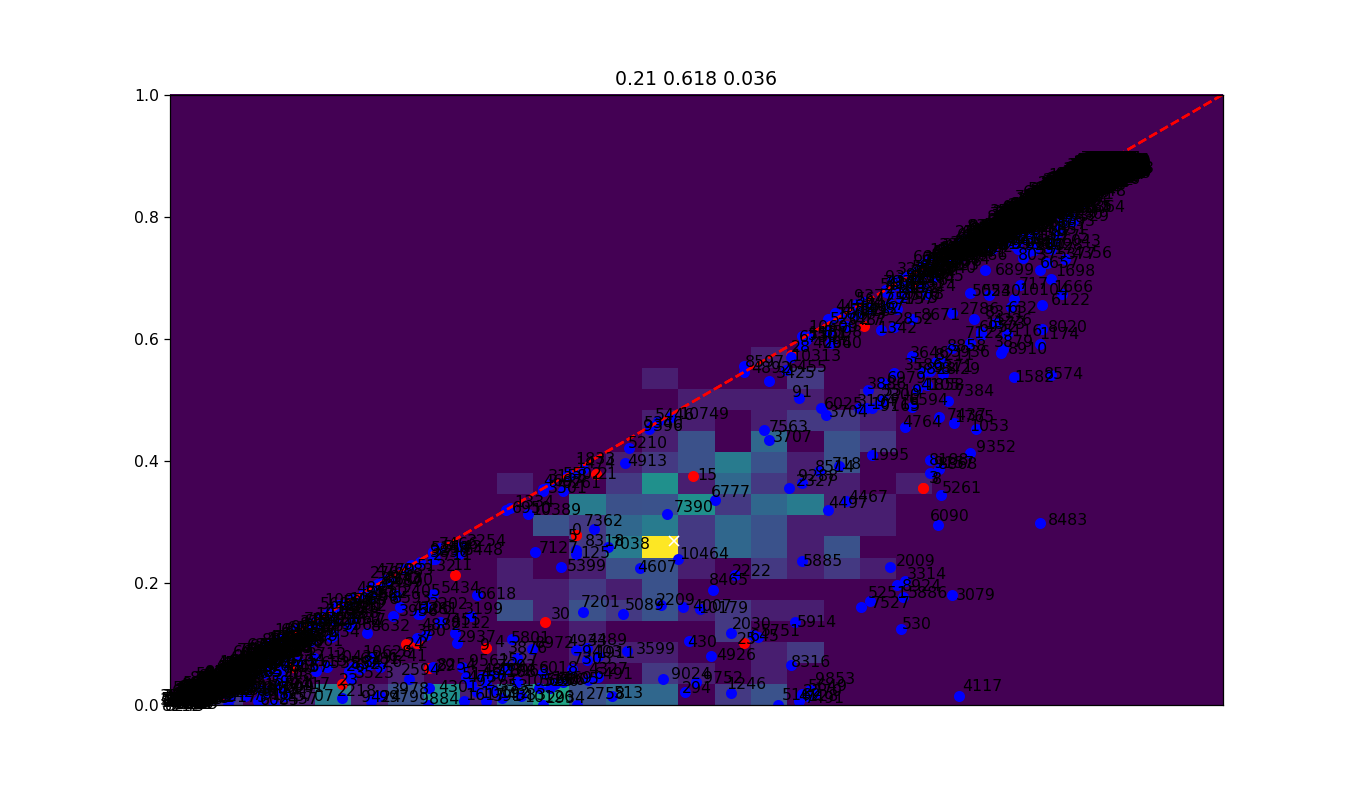

In [132]:
plt.figure(figsize=(12,7))
dt  = map(lambda x:x.get('data').get('med'),tst_out)
xs,ys = zip(*dt)
plt.scatter(*zip(*dt),color='red')
for i,(x,y) in enumerate(dt):
    x = x+(np.random.random()-0.5)/50.
    y = y+(np.random.random()-0.5)/50.
    plt.text(x,y,i )
plt.plot([0,1],[0,1],'r--')

dt  = map(lambda x:x.get('data').get('med'),out)
xs,ys = zip(*dt)
plt.scatter(*zip(*dt),color='blue')
for i,(x,y) in enumerate(dt):
    x = x+(np.random.random()-0.5)/50.
    y = y+(np.random.random()-0.5)/50.
    plt.text(x,y,i)
plt.plot([0,1],[0,1],'r--')

plt.grid()
plt.show()

<IPython.core.display.Javascript object>


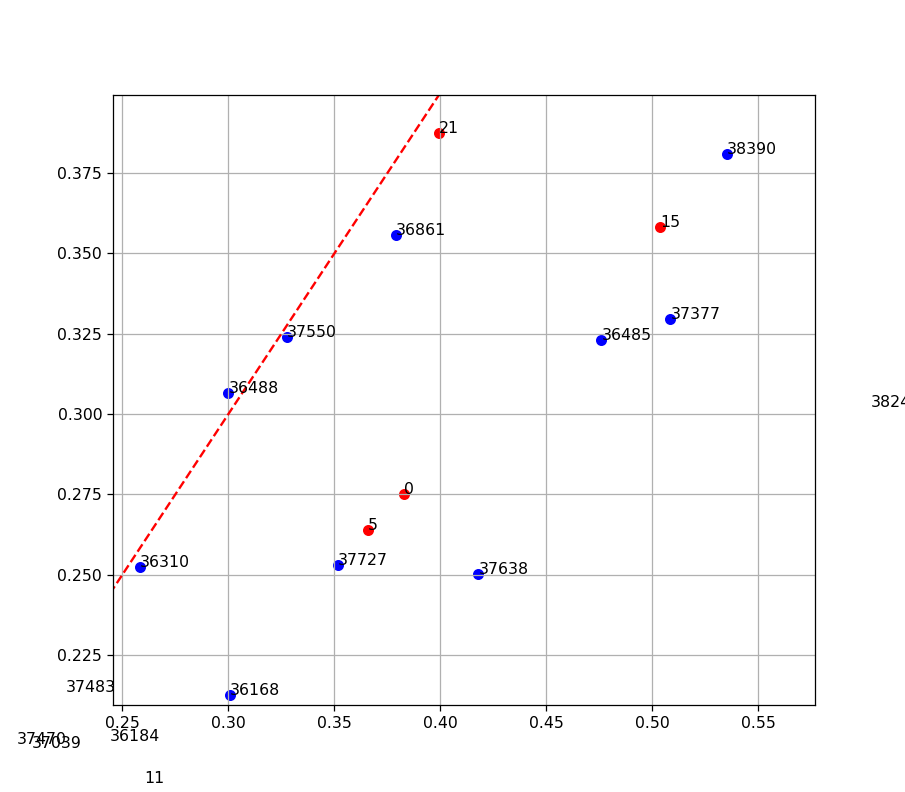

In [230]:
%matplotlib notebook
import pandas as pd
plt.figure(figsize=(8,7))
df0 = pd.DataFrame()
dt  = map(lambda x:x.get('data').get('med'),tst_out)
df = pd.DataFrame(dt)
df[2]='red'
df[3]=range(len(df))

df0 =  df0.append(df)

dt  = map(lambda x:x.get('data').get('med'),out)
df = pd.DataFrame(dt)
df[2]='blue'
df[3]=range(len(df))
df = df.loc[(df[0]<0.8)&(df[0]>0.2),:]

# idx = range(200,300)
k=15
idx = range(k*100,(k+1)*100)
df = df.iloc[idx,:]

df0 =  df0.append(df)
# df0 = df0.loc[(df0[0]<0.8)&(df0[0]>0.2),:]
# assert 0==1
# idx = range(3000,6000)
# idx = range(200,400)
# idx = range(200)
# idx = list(idx)

def plotter(df):
    cmap = plt.get_cmap()
    pdata = zip(*df.loc[:,0:].as_matrix())
    # plt.scatter(*pdata,color='red')
    for x,y,c,i in df.as_matrix():
        x = x+(np.random.random()-0.5)/50.
        y = y+(np.random.random()-0.5)/50.
        plt.scatter(x,y,color=c)
        plt.text(x,y,i )
    plt.plot([0,1],[0,1],'--',color='red')
    plt.grid()
plotter(df0)
plt.show()

<IPython.core.display.Javascript object>


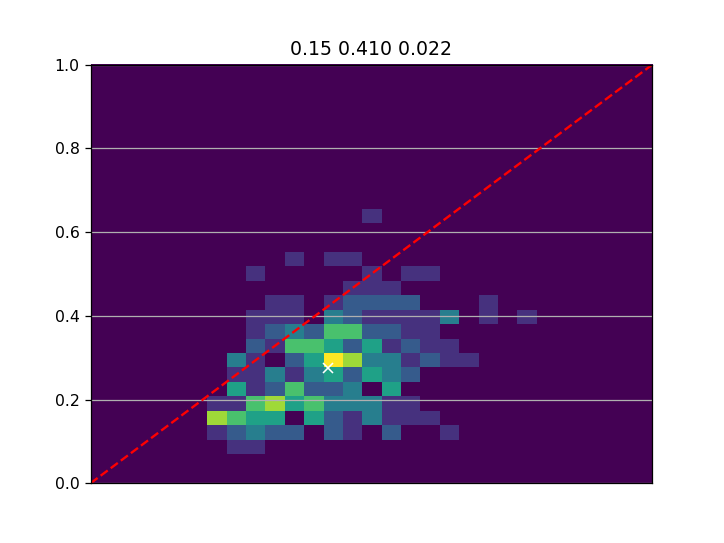

http://newflaw.com/view.php?rule_alias=b3aei2ei5aeknqr4ceinrw7e6aceik8s3acekr2aek5aceijq4aceijrty7c6aek


'http://newflaw.com/view.php?rule_alias=b3aei2ei5aeknqr4ceinrw7e6aceik8s3acekr2aek5aceijq4aceijrty7c6aek'

In [243]:
# %matplotlib inline
plt.figure()
i = (
37638
#     36168
#     28852
#     13330
#     35715
#     35888
    
)
# o = KBs.guess(dct=out[6777]['rule'])
o = KBs.guess(dct=out[i]['rule'])
workers.test0323(sysX=o)
plt.show()
KBs.lview(o)

In [178]:
hist = KBs.sample(o)
plt.figure()
plt.imshow(hist[:,0].reshape((len(hist),-1)))


In [ ]:
KBs.

In [277]:
g = '''
1315
7820
7771
8956
12073

30185
17317
18275
23207
22457
23826
25095
27200
29999
30815
35715
33579
'''



8298
9240
9845


# bottom left
bl='''
11602
11681
21713
'''

##good
27200
30815
13330
35888
33579

33579

In [ ]:
## ama
8631
28852
28081

In [ ]:
### replicator
8433
24502


In [171]:
## anti
28052
30668

28052

In [271]:
def lview(self,silent=0):
    fmt = 'http://newflaw.com/view.php?rule_alias={:}'
    uri = fmt.format(self.alias)
#     print uri
    ele = '<iframe src="{}" width=600 height=500></iframe>'.format(uri)
    if not silent:
        ipd.display(ipd.HTML(ele))
    return uri
KBs.lview = lview


In [278]:
for i in bl.splitlines():
    if not i:
        continue
    else:
        i = int(i)
        o = KBs.guess(dct=out[i]['rule'])
        print i
        print KBs.lview(o,silent=1)
#     break

11602
http://newflaw.com/view.php?rule_alias=b3ceijnr2ek5acejkqry4aejkrwz7c6aikns3eknqy2ai5acjknry4aijknq7ce6acn8
11681
http://newflaw.com/view.php?rule_alias=b1e3acjknqr2akn5aijknry4cejwyz6k8s3acejqry2ekn5acijknqr4cijnqwyz7ce6akn8
21713
http://newflaw.com/view.php?rule_alias=b3cinq2c5eijknqy4acitwz7e6acekns1c03acijknqr2ekn5kqry4aceijty7ce6i8


In [267]:
# %matplotlib inline
plt.figure()
i = (  
)
for i in g.splitlines():
    if not i:
        continue
    i = int(i)
    # o = KBs.guess(dct=out[6777]['rule'])
    o = KBs.guess(dct=out[i]['rule'])
    workers.test0323(sysX=o)
    plt.show()
    KBs.lview(o)
    raw_input('')

<IPython.core.display.Javascript object>

http://newflaw.com/view.php?rule_alias=b3aceijy2en5akn4acejknqrwz7ce6aens03eiknqy2cn5acekq4jnqw7ce6eik8



http://newflaw.com/view.php?rule_alias=b1e03eijkqr2acn5aceijr4ajknqrtw7c6ks1ce3anq2acekn5eijkqr4kqrty7ce6aeikn8



http://newflaw.com/view.php?rule_alias=b3ay2cein5cknq4aciknt7c6aeik8s1c03ijqy2ceik5ceir4cejkyz7c


KeyboardInterrupt: 

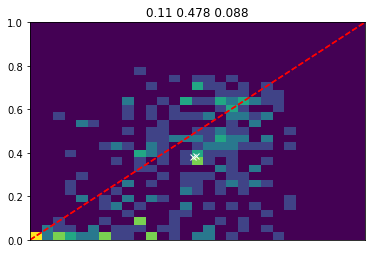

In [125]:

o = KBs.guess(dct=tst_dct[15])
workers.test0323(sysX=o)
plt.show()

In [114]:
KBs.lview(o)

http://newflaw.com/view.php?rule_alias=b1ce3aceijqy2ai5eijky4ceijkqrwy7c6ckns1c03einry2c5eijknqry4aekqryz7ce6aein8


'http://newflaw.com/view.php?rule_alias=b1ce3aceijqy2ai5eijky4ceijkqrwy7c6ckns1c03einry2c5eijknqry4aekqryz7ce6aein8'